## Data Loading

#### Task 1 (Load the provided dataset into a suitable structure)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [2]:
# load the dataset into a Pandas DataFrame
df = pd.read_csv('../data/raw/employee_raw.csv') 

In [3]:
# display the first few rows of the DataFrame to understand its structure
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


## Data Cleaning

#### Task 2 (Find duplicates and keep only the first row based on Email column)

In [4]:
# find duplicates based on Email
df[df.duplicated(subset=['Email'], keep='first')]  

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
14,EMP1014,Alice,Garcia,25.0,Admin-Nevada,Active,6/10/2024,97633.68,alice.garcia@example.com,-1734206968,Excellent,True
21,EMP1021,Bob,Jones,40.0,Cloud Tech-Illinois,Active,9/19/2020,96182.56,bob.jones@example.com,-5990048963,Good,False
22,EMP1022,Charlie,Johnson,35.0,Sales-Illinois,Inactive,3/9/2021,115023.94,charlie.johnson@example.com,-6528092427,Average,True
24,EMP1024,Bob,Brown,30.0,Admin-Texas,Inactive,2/13/2020,91181.61,bob.brown@example.com,-1502745643,Good,True
28,EMP1028,Grace,Garcia,40.0,Finance-Nevada,Active,10/11/2023,95741.88,grace.garcia@example.com,-7712151341,Excellent,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,EMP2015,David,Miller,30.0,HR-California,Active,8/19/2023,NaN,david.miller@example.com,-3546212759,Good,True
1016,EMP2016,David,Johnson,30.0,Cloud Tech-Texas,Inactive,11/7/2021,100215.06,david.johnson@example.com,-2508261122,Good,True
1017,EMP2017,Charlie,Williams,40.0,Finance-New York,Active,10/4/2023,114587.11,charlie.williams@example.com,-1261632487,Average,False
1018,EMP2018,Alice,Garcia,30.0,HR-Florida,Inactive,12/16/2024,71318.79,alice.garcia@example.com,-8995729892,Good,True


In [5]:
# check number of distinct emails
df['Email'].nunique()

64

In [6]:
# removing duplicates email and only keep first row
df=df.drop_duplicates(subset=['Email'],keep='first')

In [7]:
# the dimensions of the data after we remove duplicates
df.shape

(64, 12)

#### Task 3 (Format and store Phone number in standard format)

In [8]:
# Step 1: Remove all non-numerical elements from phone number (keep only digits)
df_Phone= df['Phone'].astype('string').str.replace(r'\D','',regex=True)

# Step 2: Define a function to format phone number to standard US format: (XXX) XXX-XXXX
# Only format if the phone number has exactly 10 digits, otherwise return NA
def if_phone_valid(phone):
    if len(phone)==10:
        return f"({phone[:3]})-{phone[3:6]}-{phone[6:]}"
    else:
        return pd.NA
        
# Step 3: Apply the formatting function to all phone numbers
df['Phone']=df_Phone.apply(if_phone_valid)

#### Task 4 (Split 'Department_Region' column into two columns)

In [9]:
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,(165)-162-3197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,(189)-847-1390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,(559)-636-3211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,(347)-649-0784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,(158)-673-4256,Poor,False


In [10]:
# split Department_Region column (format: "Department-Region") into two separate columns
# using '-' as the delimiter
df[['Department','Region']]=df['Department_Region'].str.split('-',expand=True)

# remove the original combined column as it's no longer needed
df=df.drop(columns=['Department_Region'])

#### Task 5 (Round-off Salary and store it as an integer)

In [11]:
#  Round Salary to nearest integer and convert to Int64 type
df['Salary'] = df['Salary'].round().astype('Int64')
df.head()


,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.0,Active,4/2/2021,59768,bob.davis@example.com,(165)-162-3197,Average,True,DevOps,California
1,EMP1001,Bob,Brown,NaN,Active,7/10/2020,65305,bob.brown@example.com,(189)-847-1390,Excellent,True,Finance,Texas
2,EMP1002,Alice,Jones,NaN,Pending,12/7/2023,88146,alice.jones@example.com,(559)-636-3211,Good,True,Admin,Nevada
3,EMP1003,Eva,Davis,25.0,Inactive,11/27/2021,69451,eva.davis@example.com,(347)-649-0784,Good,True,Admin,Nevada
4,EMP1004,Frank,Williams,25.0,Active,1/5/2022,109325,frank.williams@example.com,(158)-673-4256,Poor,False,Cloud Tech,Florida


In [12]:
# store the cleaned data as csv
df.to_csv('../data/cleaned/employee_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

#### Task 1 (key statistics for each column)

In [13]:
# calculate summary statistics for all columns (both numerical and categorical)
# include='all' ensures that categorical columns are also included in the summary
df.describe(include='all')

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
count,64,64,64,47.000000,64,64,63.0,64,61,64,64,64,64
unique,64,8,8,NaN,3,61,<NA>,64,61,4,2,6,6
top,EMP1000,Bob,Davis,NaN,Active,7/10/2020,<NA>,bob.davis@example.com,(165)-162-3197,Excellent,True,Admin,Nevada
freq,1,8,8,NaN,27,2,<NA>,1,1,20,32,14,15
mean,NaN,NaN,NaN,32.127660,NaN,NaN,83564.587302,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.056319,NaN,NaN,18866.666303,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,25.000000,NaN,NaN,52032.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,25.000000,NaN,NaN,66367.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,30.000000,NaN,NaN,84946.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,40.000000,NaN,NaN,95101.5,NaN,NaN,NaN,NaN,NaN,NaN


#### Task 2 (Calculate aggregate metrics)

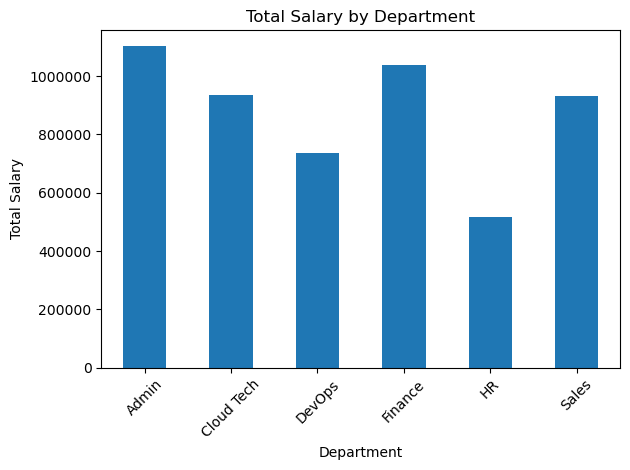

Department
Admin         1101877
Cloud Tech     936323
DevOps         737864
Finance       1038823
HR             516494
Sales          933188
Name: Salary, dtype: Int64

In [14]:
# calculate total salary by department using groupby and sum
salary_by_dept = df.groupby('Department')['Salary'].sum()

# create a bar plot to visualize the results
salary_by_dept.plot(kind='bar')

# customize the plot appearance
plt.title('Total Salary by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y')  # display full numbers instead of scientific notation
plt.tight_layout()
plt.show()

# display the numerical results
salary_by_dept


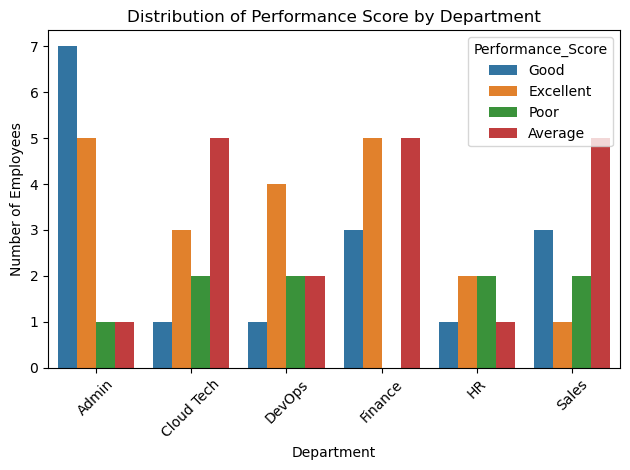

,Department,Performance_Score,count
0,Admin,Good,7
1,Admin,Excellent,5
2,Admin,Poor,1
3,Admin,Average,1
4,Cloud Tech,Average,5
5,Cloud Tech,Excellent,3
6,Cloud Tech,Poor,2
7,Cloud Tech,Good,1
8,DevOps,Excellent,4
9,DevOps,Poor,2


In [15]:
# analyze the distribution of performance scores by department

# Step 1: Group by Department and Performance_Score, then count occurrences
# This creates a DataFrame with counts for each combination
perf_dist = (
    df.groupby('Department')['Performance_Score']
      .value_counts()
      .reset_index(name='count')
)

# Step 2: Create a grouped bar plot using seaborn
# Each department will have bars for each performance score level
sns.barplot(
    data=perf_dist,
    x='Department',
    y='count',
    hue='Performance_Score'
)

# Step 3: Customize plot appearance
plt.title('Distribution of Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # rotate labels for better readability
plt.tight_layout()
plt.show()

# display the numerical results
perf_dist


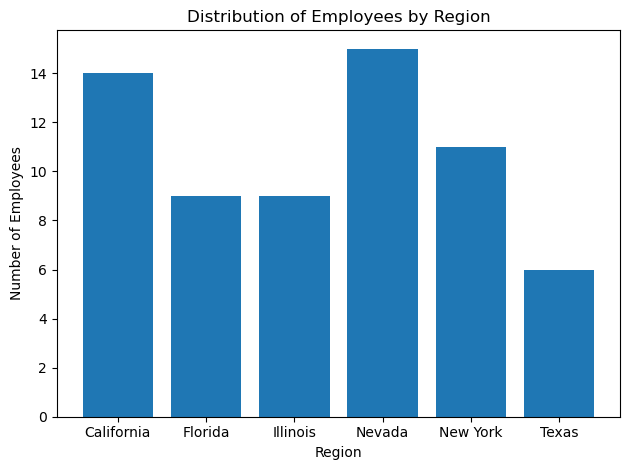

,Region,count
0,California,14
1,Florida,9
2,Illinois,9
3,Nevada,15
4,New York,11
5,Texas,6


In [16]:
# analyze the distribution of employees across different regions

# Step 1: Count the number of employees in each region using groupby and size
region_dist = df.groupby('Region').size().reset_index(name='count')

# Step 2: Create a bar plot to visualize the distribution
plt.bar(region_dist['Region'], region_dist['count'])

# Step 3: Customize plot appearance
plt.title('Distribution of Employees by Region')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

# display the numerical results
region_dist

## Validation for HR Agent

In [17]:
# Question 1: Which Region(s) offer the highest salary to employees on average?
# Group by Region, calculate mean salary, and sort in descending order
df.groupby('Region')['Salary'].mean().sort_values(ascending=False)

Region
Illinois      94400.111111
Texas         87022.666667
Florida       86901.666667
Nevada        81318.666667
New York      79266.363636
California    78385.153846
Name: Salary, dtype: Float64

In [18]:
# Question 2: Show me a list of top performers in each department?
# Step 1: Inspect unique performance score values and define ordering
# Performance levels: Excellent > Good > Average > Poor
performance_order = {'Excellent': 4, 'Good': 3, 'Average': 2, 'Poor': 1}

# Step 2: Convert Performance_Score to numeric rank for computation
df['Performance_Rank'] = df['Performance_Score'].map(performance_order)

# Step 3: For each department, find the maximum performance rank using transform
df['Dept_Max_Rank'] = df.groupby('Department')['Performance_Rank'].transform('max')

# Step 4: Return ALL employees whose rank equals the department maximum
top_performers = df[df['Performance_Rank'] == df['Dept_Max_Rank']].copy()

# Step 5: Select and sort by Department (asc), then Employee_ID (asc)
top_performers = top_performers[['Department', 'Employee_ID', 'First_Name', 'Last_Name', 'Performance_Score']].sort_values(['Department', 'Employee_ID'])

# Display results (drop intermediate columns)
top_performers


,Department,Employee_ID,First_Name,Last_Name,Performance_Score
8,Admin,EMP1008,Frank,Davis,Excellent
34,Admin,EMP1034,Heidi,Miller,Excellent
43,Admin,EMP1043,Bob,Garcia,Excellent
48,Admin,EMP1048,Alice,Miller,Excellent
66,Admin,EMP1066,Grace,Brown,Excellent
18,Cloud Tech,EMP1018,Charlie,Garcia,Excellent
50,Cloud Tech,EMP1050,Charlie,Davis,Excellent
57,Cloud Tech,EMP1057,Alice,Smith,Excellent
9,DevOps,EMP1009,Charlie,Johnson,Excellent
31,DevOps,EMP1031,Bob,Smith,Excellent


In [ ]:
# Question 3: Who are the most tenured employees in each department?
# Step 1: Ensure Join_Date is datetime
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce')

# Step 2: Compute department-wise minimum Join_Date
df['Dept_Min_Join_Date'] = df.groupby('Department')['Join_Date'].transform('min')

# Step 3: Keep employees whose Join_Date equals department minimum
most_tenured = df[df['Join_Date'] == df['Dept_Min_Join_Date']]

# Step 4: Select required columns
most_tenured = most_tenured[
    ['Department', 'Employee_ID', 'First_Name', 'Last_Name', 'Join_Date']
].sort_values(['Department', 'Employee_ID'])

most_tenured


,Department,Employee_ID,First_Name,Last_Name,Join_Date
19,Admin,EMP1019,Charlie,Williams,2020-01-02
25,Cloud Tech,EMP1025,David,Miller,2020-04-30
93,DevOps,EMP1093,Eva,Miller,2020-01-21
44,Finance,EMP1044,Eva,Brown,2020-07-08
20,HR,EMP1020,Bob,Miller,2021-05-08
5,Sales,EMP1005,Alice,Garcia,2020-06-10
